# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [ ]:
# For Google Colaboratory
import sys, os

from torch.nn.functional import softmax

if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2026_codes/labs_lecture03/lab04_train_vanilla_nn'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [2]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

train_data=torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

FASHION-MNIST dataset missing - downloading...


100.0%


Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



100.0%


Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



100.0%


Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



100.0%


Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw

torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [3]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [23]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        # complete here
        self.fc1 = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        
        x = self.fc1(x) # complete here
        p = torch.nn.functional.softmax(x, dim=-1)
        
        return p

### Build the net

In [24]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


### Take the 4th image of the test set:

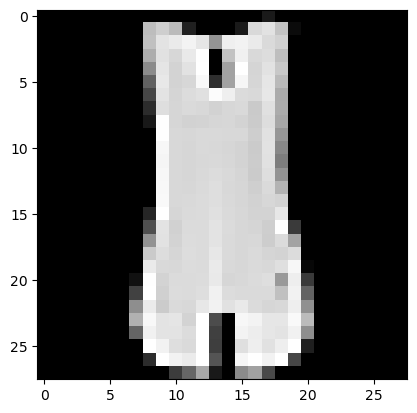

In [25]:
im= train_data[4]# complete here
utils.show(im)

### And feed it to the UNTRAINED network:

In [26]:
print(im.size())
p = net(im.view(1, 784))# complete here
print(p)

torch.Size([28, 28])
tensor([[0.0983, 0.2053, 0.1457, 0.0551, 0.0592, 0.0747, 0.0932, 0.0808, 0.0864,
         0.1013]], grad_fn=<SoftmaxBackward0>)


### Display visually the confidence scores

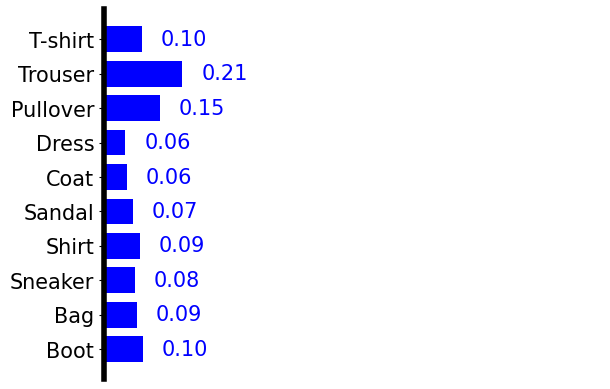

In [27]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [30]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):

    # choose a random integer between 0 and 59,999
    # extract the corresponding picture and label
    # and reshape them to fit the network
    i = randint(0, 60000)
    data = train_data[i].view(1, 784)
    label = train_label[i].view(1)

    # complete here
    # complete here
    # complete here

    # feed the input to the net
    data.requires_grad_() # for backprobagation -- we will discuss it later
    prob = net(data)
    # complete here

    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

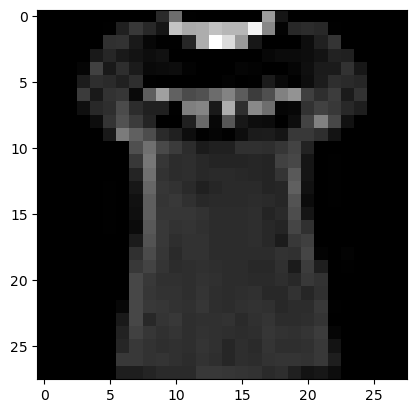

In [31]:
im=train_data[34] # complete here
utils.show(im)

### Feed it to the TRAINED net:

In [34]:
prob = net(im.view(1, 784)) # complete here
print(prob)

tensor([[0.5408, 0.0510, 0.0906, 0.0726, 0.0314, 0.0147, 0.1596, 0.0043, 0.0268,
         0.0081]], grad_fn=<SoftmaxBackward0>)


### Display visually the confidence scores

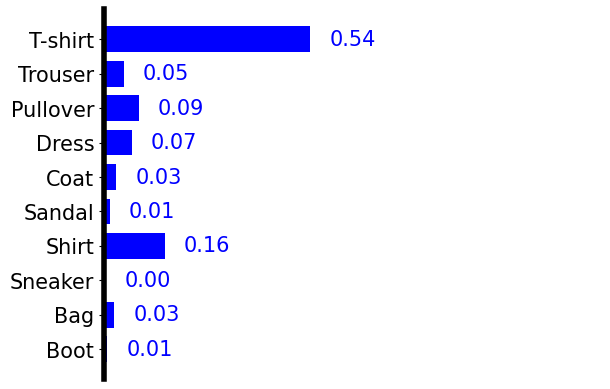

In [35]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

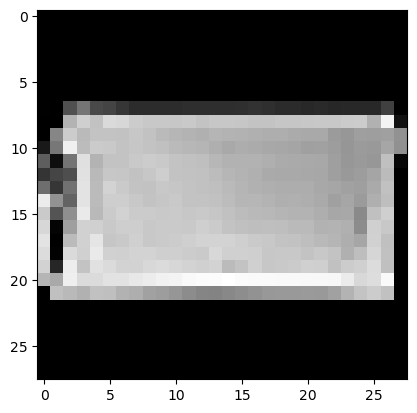

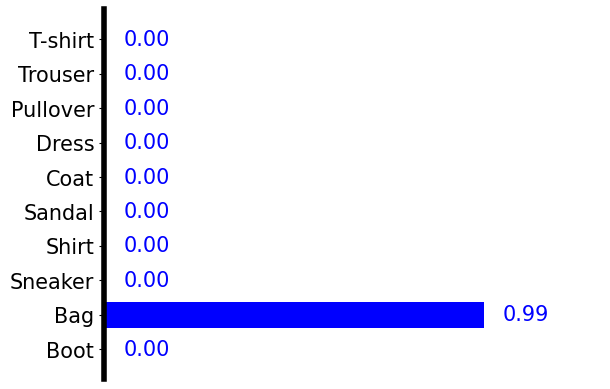

In [36]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)